# Week 2 lecture notes

From Coursera course, Understanding and Visualizing Data.  
Patricia Schuster  
University of Michigan

# Categorical data: Tables, Bar Charts and Pie Charts

Categorial data classfies individuals or items into different groups.

The most common way to summarize the data is to group by category and assemble a frequency table of counts, percentages. 

The most common way to visualize is with a bar chart. Sometimes you arrange in descending order. 

Don't recommend pie charts: Labels can overlap, it's hard to compare slice sizes. 

# Quantitative data: Histogram

Great first look at the data. Allows you to see the distribution of data in a compact way. Each rectangle is called a bin. Python will automatically set bin edges.

4 aspects:

* Shape: Overall appearance. Can be symmetric, bell-shaped, left skewed, right skewed, etc. Unimodal = one peak. "Right skewed" means it leans to the left and has a tail to the right. 
* Center: Mean or median position
* Spread: How far our data spreads. Range, interquartile range (IQR), standard deviation, variance
* Outliers: Data points that fall far from the bulk of the data

Example summary of the features on a distribution- cover each of those four aspects. "The distribution of adult male heights is roughly bell shaped with a center of about 68 inches, a range of 13 inches (62 to 75) and no apparent outliers."

# Quantitative data: Numerical summaries

5 number summary:

* Min (0%)
* 1st quartile (25%)
* Median (50%)
* 3rd quartile (75%)
* Max (100%)

Others

* Mean
* IQR Inter quartile range (20-75%), useful when the data is left or right skewed.
* Standard deviation: Average size that points fall away from the mean
* Sample size

# Standard score (Empirical Rule)

For a normal distribution:

* 68% of data fall within 1-sigma of the mean
* 95% of data fall within 2-sigma of the mean
* 99.7% of data fall within 3-sigma of the mean

This allows us to get an idea of how unusual a data point is. Calculate a standard score:

$ z = (x-\mu)/\sigma$

A negative value means $x$ is below the mean.

# Quantitative data: box plots

Gives a visual representation of the 5-number summary. 

![Boxplot](fig/boxplot.png)

Often called a box and whisker plot. 

The 1st and 3rd quartiles define the box. The median is the line through the box. The min and max are the whiskers.

Boxplots have a separate function for determining outliers and they are plotted as individual data plots outside the mix and max. 

Limitation: Hides some shape, which histogram displays better.

# Tables, histograms, and boxplots in Python

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Load a tips dataset, which is a default dataset in seaborn

In [2]:
tips_data = sns.load_dataset("tips")

View it in table form, just the first five lines.

In [3]:
tips_data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Describe the table to me. Default behavior is only to describe quantitative metrics in numerical columns. I can use the `include` parameter to explicitly add additional columns

In [4]:
tips_data.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

In [5]:
tips_data.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [6]:
tips_data.describe(include=['float','int64','category'])

,total_bill,tip,sex,smoker,day,time,size
count,244.000000,244.000000,244,244,244,244,244.000000
unique,NaN,NaN,2,2,4,2,NaN
top,NaN,NaN,Male,No,Sat,Dinner,NaN
freq,NaN,NaN,157,151,87,176,NaN
mean,19.785943,2.998279,NaN,NaN,NaN,NaN,2.569672
std,8.902412,1.383638,NaN,NaN,NaN,NaN,0.951100
min,3.070000,1.000000,NaN,NaN,NaN,NaN,1.000000
25%,13.347500,2.000000,NaN,NaN,NaN,NaN,2.000000
50%,17.795000,2.900000,NaN,NaN,NaN,NaN,2.000000
75%,24.127500,3.562500,NaN,NaN,NaN,NaN,3.000000


## Create a histogram

Look at the total bill. 

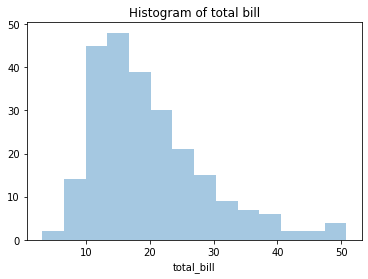

In [7]:
# Plot a histogram of the total bill amount
sns.distplot(tips_data['total_bill'], kde=False).set_title("Histogram of total bill")
plt.show()

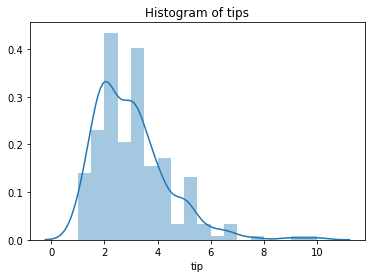

In [12]:
# Plot a histogram of the tips
# This time leave kde on... the smoothing curve
sns.distplot(tips_data['tip']).set_title("Histogram of tips")
plt.show()

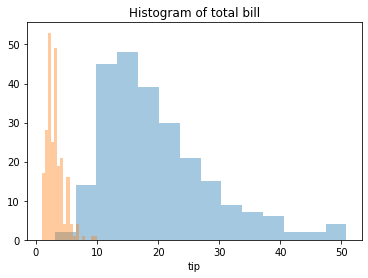

In [13]:
# Plot both together.
sns.distplot(tips_data['total_bill'], kde=False)
sns.distplot(tips_data['tip'], kde=False).set_title("Histogram of total bill")
plt.show()

## Create a boxplot

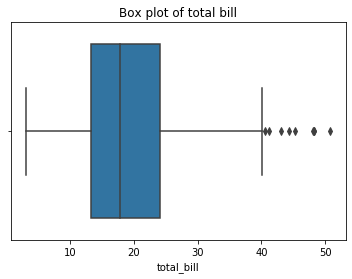

In [14]:
sns.boxplot(tips_data["total_bill"]).set_title("Box plot of total bill")
plt.show()

By default, if we want to plot them both together, it will pile separate plots on top of each other. Let's see:

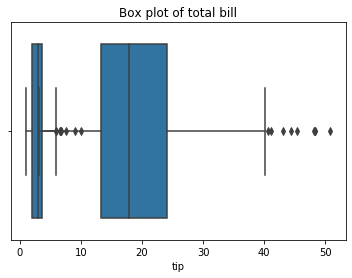

In [18]:
sns.boxplot(tips_data["total_bill"])
sns.boxplot(tips_data["tip"]).set_title("Box plot of total bill")
plt.show()

We don't want these on the same axis. How do we plot them separately?

## Plot by groups

Separate by smokers and not smokers. All we have to do is provide the category by which we are splitting the data as the y-axis.

In [22]:
tips_data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


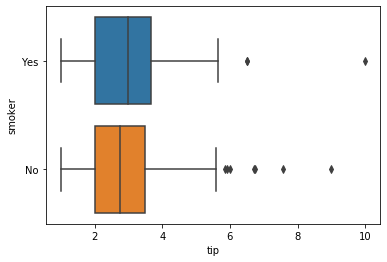

In [23]:
sns.boxplot(x = tips_data["tip"], y=tips_data["smoker"])
plt.show()

The quartile ranges look similar for these, but are the shapes of the data the same? Look at the histograms separately with a function `sns.FacetGrid`.

This automatically matches the axes range so they are directly comparable.

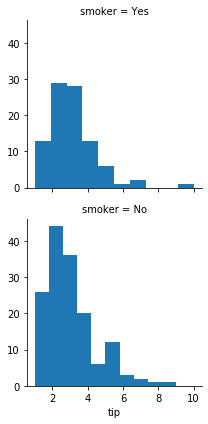

In [29]:
g = sns.FacetGrid(tips_data, row = "smoker")
g = g.map(plt.hist, "tip")

Look as grouped by time of day.

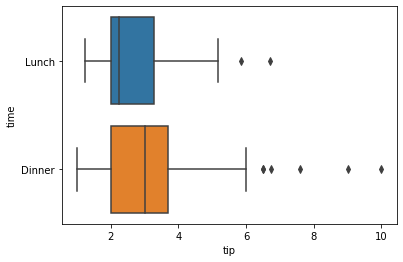

In [30]:
sns.boxplot(x = 'tip',
            y = 'time',
            data = tips_data)
plt.show()

Dinner generates higher tips than lunch. Look at a histogram. 

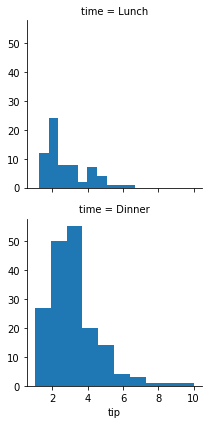

In [32]:
g = sns.FacetGrid(tips_data, row = "time")
g = g.map(plt.hist, "tip")

Observation: There are a lot more diners at dinner than lunch, and tips are higher then, so if I were a server I would want to work during dinner. 

Invert and look vs. day.

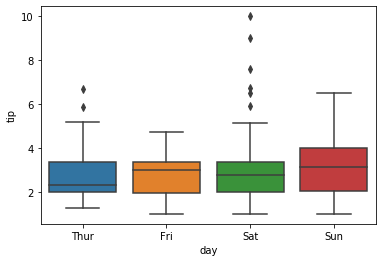

In [33]:
sns.boxplot(x="day",
            y="tip",
            data = tips_data)
plt.show()

How would you decide what day to work? A few observations:

* Sunday has the largest tip on average, Thursday has the worst tip on average
* Saturday has the most high outliers
* Friday has the smallest range

Now look at the shapes.

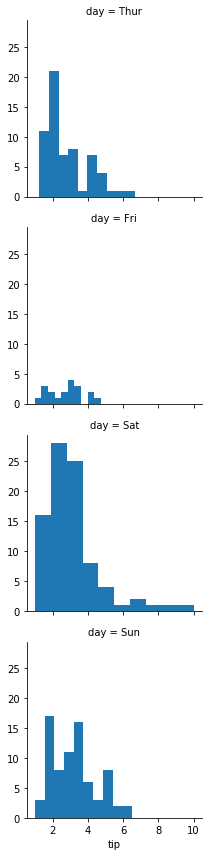

In [34]:
g = sns.FacetGrid(tips_data, "day")
g = g.map(plt.hist, "tip")

Now compare smokers and non-smokers within each day. You can do this by adding as a `hue`.

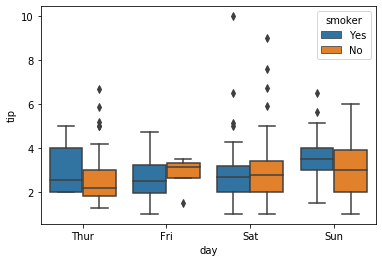

In [27]:
sns.boxplot(x=tips_data["day"], y = tips_data["tip"], hue=tips_data["smoker"])
plt.show()

Another way to input all of this is just with the column names, and then provide the name of the dataframe as the `data` input parameter. This simplifies things.

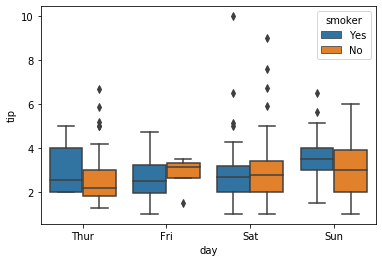

In [39]:
sns.boxplot(x=  "day", 
            y = "tip", 
            hue= "smoker",
            data = tips_data)
plt.savefig('tips_data.png')
plt.show()

It looks like we can break out the FacetGrid into eight plots to see the distributions for these eight boxes. 

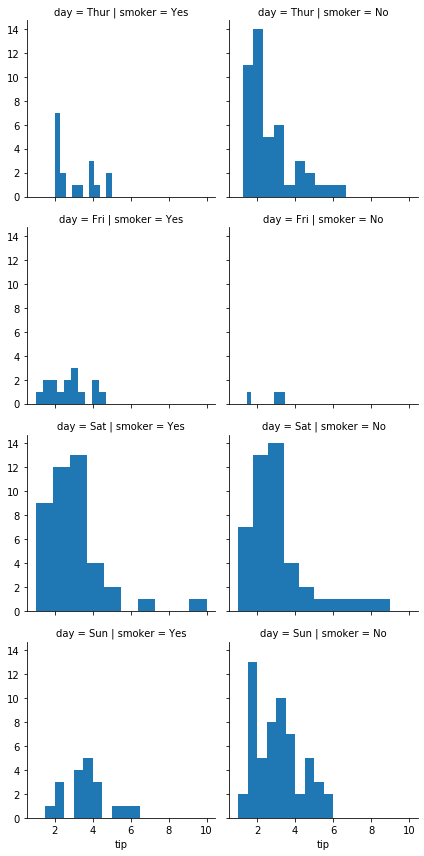

In [35]:
g = sns.FacetGrid(tips_data, row="day", col="smoker")
g = g.map(plt.hist, "tip")

My first observation is that there are generally fewer smokers than non-smokers, except on Saturday when it appears to be roughly even. 